# Pymaceuticals Inc.
---

### Analysis

Capomulin and Ramicane: These two drug regimens have the highest number of observed mouse timepoints, indicating they were the most frequently monitored. This could suggest a higher interest in their effects or better tolerance by the mice.
Propriva: This regimen has the lowest number of observed timepoints, which might imply less interest or poorer results in initial trials.
Other Regimens: The remaining drug regimens (Ketapril, Naftisol, Zoniferol, Stelasyn, Placebo, Infubinol, and Ceftamin) have moderate observation counts. This suggests a balanced interest in these treatments, possibly due to varying efficacy or side effects.
Study Design Implications: The variation in observation counts could reflect differences in the study design, such as the duration of treatment, dosage, or the specific outcomes being measur

Nearly Equal Distribution: The pie chart shows that the gender distribution is almost equal, with 50.4% Male and 49.6% Female. This indicates a balanced representation of both genders.
Implications for Study: Such a balanced distribution is beneficial for studies aiming to generalize findings across genders, ensuring that results are not biased towards one gender.
Potential for Further Analysis: With this nearly equal split, further analysis could explore if there are any significant differences in outcomes or behaviors between the two groups.Ramicane and Capomulin: These two drug regimens show the lowest median final tumor volumes, indicating they are the most effective in reducing tumor size. They also have smaller interquartile ranges, suggesting consistent results across different subjects.
Infubinol: This regimen has a higher median final tumor volume compared to Ramicane and Capomulin. It also has an outlier below its first quartile, indicating some variability in its effectiveness.
Ceftamin: Similar to Infubinol, Ceftamin has a higher median final tumor volume and a larger interquartile range, indicating more variability in its results.
Overall Effectiveness: Ramicane and Capomulin appear to be more effective in reducing tumor size compared to Infubinol and Ceftamin, based on the lower median final tumor volumes and smaller variabilit
Positive Correlation: The scatter plot shows a positive correlation between mouse weight and average tumor volume. As the weight of the mice increases, the average tumor volume also tends to increase.
Line of Best Fit: The red line of best fit indicates a general trend that heavier mice have larger tumor volumes. This could suggest that the efficacy of Capomulin might vary with the weight of the mice.
Data Distribution: The data points are fairly spread out, but the trend remains consistent, reinforcing the positive correlation.
Implications for Treatment: Understanding this correlation can help in optimizing dosage and treatment plans based on the weight of the subjects..

ed.
 

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results,how="right", on="Mouse ID")
merged_df_columns = [
    "Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex",
    "Age_months", "Weight (g)"
]

mouse_study_df = mouse_study_df.loc[:, merged_df_columns]

# Display the data table for preview
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [123]:
# Checking the number of mice.
mice_count = mouse_study_df["Mouse ID"].nunique()
mice_count

249

In [124]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupe_id = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dupe_id

array(['g989'], dtype=object)

In [125]:
# Optional: Get all the data for the duplicate mouse ID.
#dupe_id_df = mouse_study_df[mouse_study_df.duplicated(subset=["Mouse ID","Timepoint"])]
dupe_id_df = mouse_study_df [mouse_study_df["Mouse ID"]=="g989"]
dupe_id_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [126]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_df [mouse_study_df["Mouse ID"]!="g989"]
#clean_df.reset_index(drop=True, inplace=True)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [127]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_df["Mouse ID"].nunique()
mice_count

248

## Summary Statistics

In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = mouse_study_df.groupby("Drug Regimen").apply(lambda x: pd.DataFrame({
    'Mean Tumor Volume': x['Tumor Volume (mm3)'].mean(),
    'Median Tumor Volume': x['Tumor Volume (mm3)'].median(),
    'Tumor Volume Variance': x['Tumor Volume (mm3)'].var(),
    'Tumor Volume Std. Dev.': x['Tumor Volume (mm3)'].std(),
    'Tumor Volume Std. Err.': x['Tumor Volume (mm3)'].sem()
}, index=[0]))

summary_statistics                         

C:\Users\ojess\AppData\Local\Temp\ipykernel_13096\2439591801.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_statistics = mouse_study_df.groupby("Drug Regimen").apply(lambda x: pd.DataFrame({


,,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,,
Capomulin,0,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,0,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,0,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,0,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,0,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,0,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,0,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,0,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,0,54.233149,52.431737,59.450562,7.710419,0.573111


In [130]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = mouse_study_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_statistics.columns = ["mean", "median", "var", "std","sem"]
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

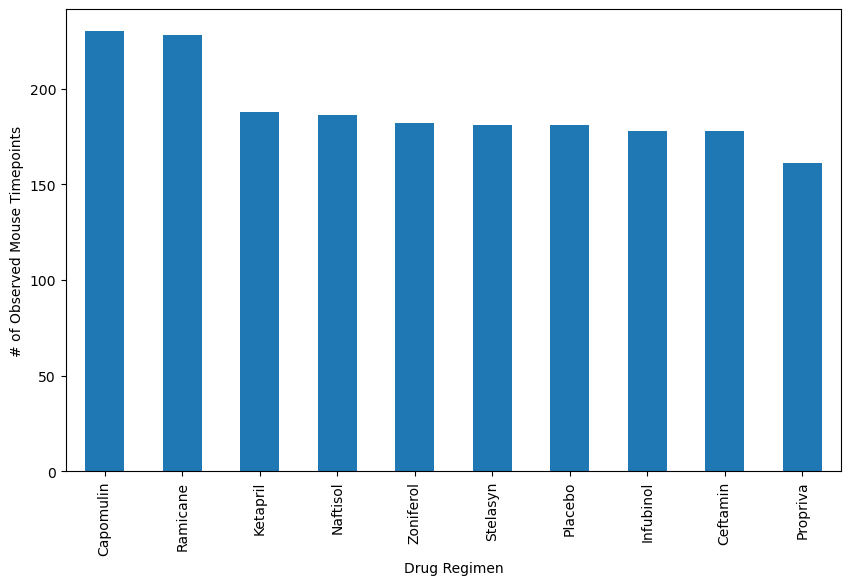

In [132]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
ordered_regimens = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 
                    'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 
                    'Ceftamin', 'Propriva']
drug_regimen_counts = mouse_study_df['Drug Regimen'].value_counts()
drug_regimen_counts = drug_regimen_counts.reindex(ordered_regimens)
drug_regimen_counts.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

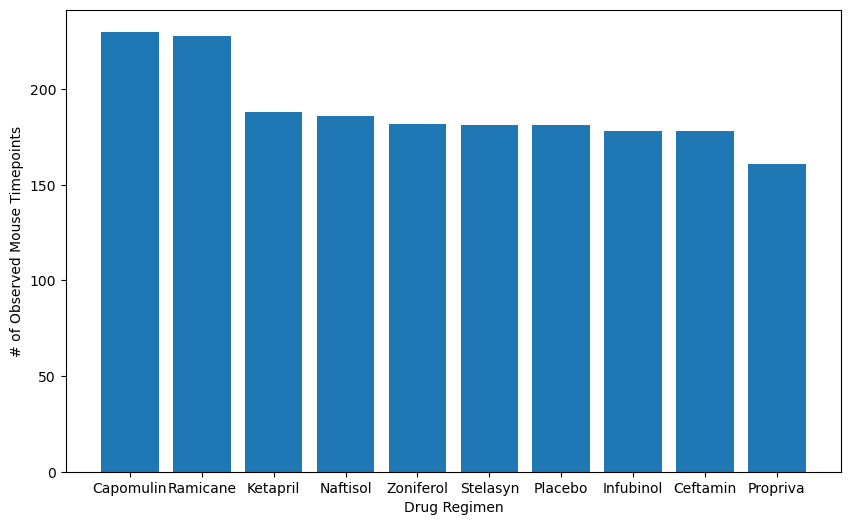

In [133]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
ordered_regimens = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 
                    'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 
                    'Ceftamin', 'Propriva']

drug_regimen_counts = drug_regimen_counts.reindex(ordered_regimens)
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='tab:blue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

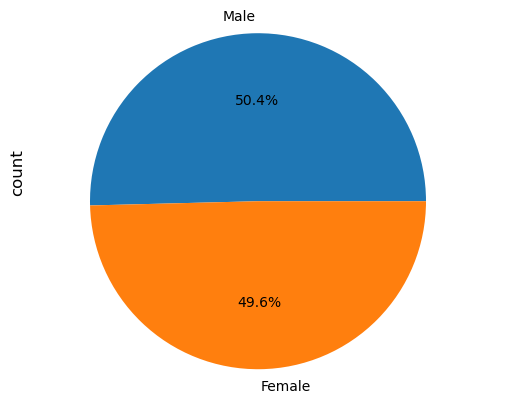

In [134]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_count = clean_df[["Mouse ID", "Sex"]].drop_duplicates().groupby("Sex").size().sort_values(ascending = False)
gender_count.plot.pie(autopct="%1.1f%%")

plt.title ("count", loc="left", rotation="vertical", y=0.5)
plt.axis("equal")
plt.show ()




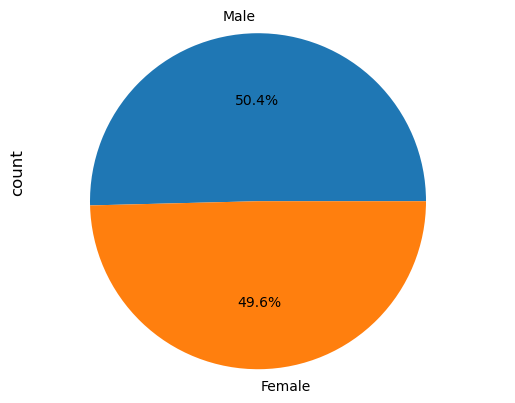

In [135]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = ["Male", "Female"]
sizes = [50.4, 49.6]
colors = ["tab:blue", "tab:orange"]

# Make the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title ("count", loc="left", rotation="vertical", y=0.5)
plt.axis("equal")
plt.show ()

## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_df = clean_df[clean_df["Drug Regimen"].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = mouse_study_df.groupby("Mouse ID")["Timepoint"].max()
#last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints, filtered_df, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volume_df = final_tumor_volume_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
final_tumor_volume_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,NaN,45,NaN
3,a275,Ceftamin,45,62.999356
4,a366,NaN,30,NaN
...,...,...,...,...
244,z435,NaN,10,NaN
245,z578,Ramicane,45,30.638696
246,z581,Infubinol,45,62.754451
247,z795,NaN,45,NaN


In [138]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [
"Capomulin",
"Ceftamin",
"Infubinol",
"Ketapril",
"Naftisol",
"Placebo",
"Propriva",
"Ramicane",
"Stelasyn",
"Zoniferol"
]

treatments = mouse_study_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

for treatment in treatments:
    treatment_data = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

tumor_volume_data.append(treatment_data)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.

quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

  # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

     
outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]



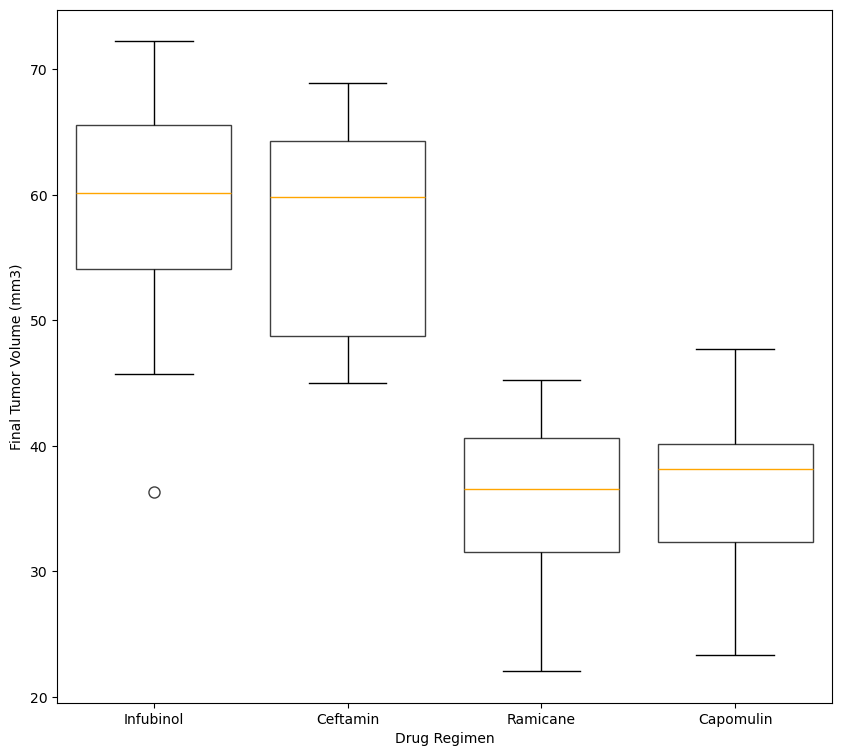

In [139]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 9))
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=final_tumor_volume_df,
          boxprops=dict(facecolor='white'),
                      whiskerprops=dict(color='black'),
                      capprops=dict(color='black'),
                      medianprops=dict(color='orange'),
flierprops=dict(marker='o', color='red', markersize=8))

plt.ylabel('Final Tumor Volume (mm3)')

plt.xticks()

#plt.tight_layout()
plt.show()


## Line and Scatter Plots

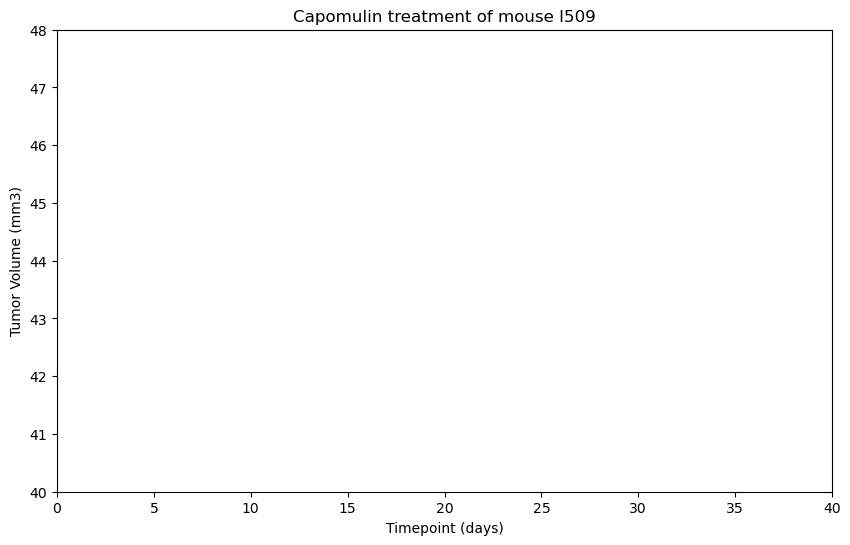

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


In [141]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select data for a single mouse treated with Capomulin
mouse_id = 'I509'
capomulin_mouse = mouse_study_df[(mouse_study_df['Drug Regimen'] == 'Capomulin') & (mouse_study_df['Mouse ID'] == mouse_id)]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker='o')

# Adding labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')

plt.xlim(0, 40)
plt.ylim(40, 48)
plt.show()
print(capomulin_mouse)

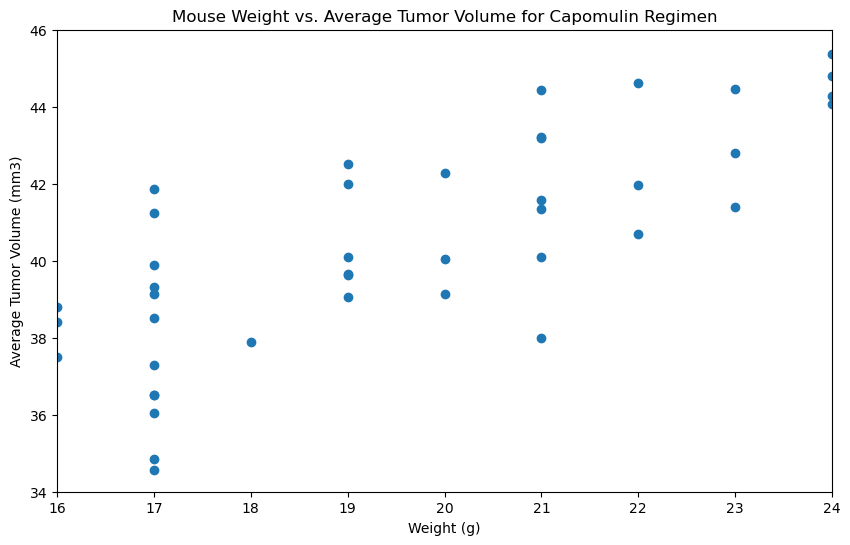

In [142]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average tumor volume for each mouse
avg_tumor_volume = mouse_study_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_volume = avg_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume (mm3)'})

# Merge the average tumor volume with the original data to get the weight
merged_data = pd.merge(avg_tumor_volume, mouse_study_df[['Mouse ID', 'Weight (g)']], on='Mouse ID').drop_duplicates()

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Avg Tumor Volume (mm3)'], marker='o')

# Adding labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.xlim(16, 24)
plt.ylim(34, 46)

plt.show()

## Correlation and Regression

Correlation coefficient: 0.6592482941546902
Slope: 1.0966925374238428
Intercept: 21.02408854870573
R-squared: 0.4346083133458691


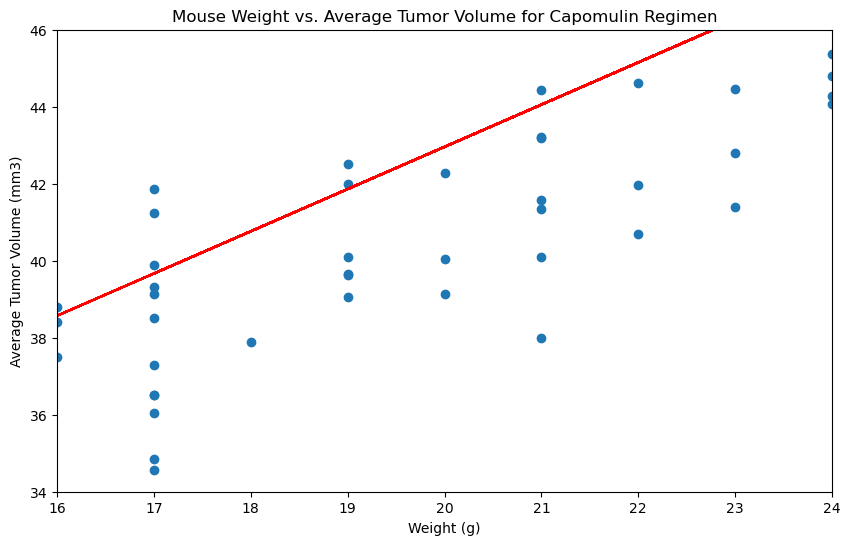

In [165]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume for each mouse
avg_tumor_volume = mouse_study_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_volume = avg_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume (mm3)'})

# Merge the average tumor volume with the original data to get the weight
merged_data = pd.merge(avg_tumor_volume, mouse_study_df[['Mouse ID', 'Weight (g)']], on='Mouse ID').drop_duplicates()

# Calculate the correlation coefficient
correlation = merged_data['Weight (g)'].corr(merged_data['Avg Tumor Volume (mm3)'])
print(f'Correlation coefficient: {correlation}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Avg Tumor Volume (mm3)'])
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_value**2}')

# Generate the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Avg Tumor Volume (mm3)'], marker='o')
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red')

# Adding labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Set x-axis and y-axis limits
plt.xlim(16, 24)
plt.ylim(34, 46)


plt.show()